<a href="https://colab.research.google.com/github/lucamachado49/Modelos-de-Regressao-Linear/blob/main/VaR_Petr%C3%B3leo%2C_Ouro_e_G%C3%A1s_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 26.7 MB/s eta 0:00:00


In [2]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
from arch import arch_model

In [3]:
# 1. Coleta de Dados
def baixar_dados(tickers, inicio, fim):
    """
    Baixa dados históricos de múltiplos ativos usando yfinance.
    """
    dados = yf.download(tickers, start=inicio, end=fim)
    if 'Adj Close' in dados.columns:
        return dados['Adj Close']
    elif 'Close' in dados.columns:
        return dados['Close']
    else:
        raise KeyError(f"A coluna 'Adj Close' ou 'Close' não está disponível para {ticker}. Dados retornados: {dados.columns}")

# Baixar dados das commodities (Petróleo Brent, Gás Natural, Ouro)
tickers = ['BZ=F', 'NG=F', 'GC=F']
dados_commodities = baixar_dados(tickers, '2000-01-01', '2023-01-01')

/tmp/ipython-input-3-3539447107.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(tickers, start=inicio, end=fim)
[*********************100%***********************]  3 of 3 completed


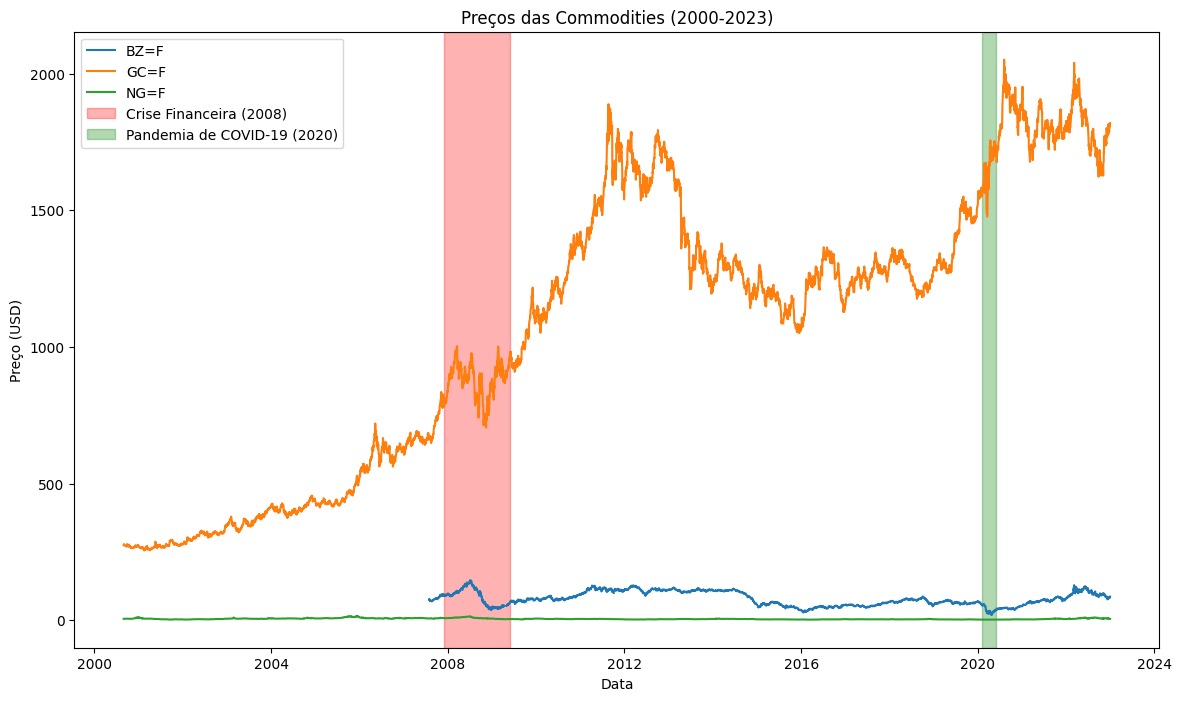

In [4]:
# 2. Análise Exploratória
def calcular_retornos(dados):
    """
    Calcula os retornos logarítmicos diários.
    """
    return np.log(dados / dados.shift(1)).dropna()

retornos_commodities = calcular_retornos(dados_commodities)

# Visualização dos preços das commodities
plt.figure(figsize=(14, 8))
for coluna in dados_commodities.columns:
    plt.plot(dados_commodities[coluna], label=coluna)
plt.axvspan('2007-12-01', '2009-06-01', color='red', alpha=0.3, label='Crise Financeira (2008)')
plt.axvspan('2020-02-01', '2020-06-01', color='green', alpha=0.3, label='Pandemia de COVID-19 (2020)')
plt.title('Preços das Commodities (2000-2023)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

In [5]:
# 3. Análise de Eventos de Estresse
def analisar_periodo(dados, retornos, inicio, fim, nome_periodo):
    """
    Analisa um período específico, calculando estatísticas descritivas.
    """
    periodo_dados = dados.loc[inicio:fim]
    periodo_retornos = retornos.loc[inicio:fim]

    print(f"\nAnálise do Período: {nome_periodo} ({inicio} a {fim})")
    print(f"Preço Médio: {periodo_dados.mean():.2f}")
    print(f"Volatilidade (Desvio Padrão dos Retornos): {periodo_retornos.std():.4f}")
    print(f"Drawdown Máximo: {(periodo_dados.min() / periodo_dados.max() - 1):.2%}")

# Crise Financeira de 2008
analisar_periodo(dados_commodities['BZ=F'], retornos_commodities['BZ=F'], '2007-12-01', '2009-06-01', 'Crise Financeira (2008) - Petróleo')
analisar_periodo(dados_commodities['GC=F'], retornos_commodities['GC=F'], '2007-12-01', '2009-06-01', 'Crise Financeira (2008) - Ouro')

# Pandemia de COVID-19 (2020)
analisar_periodo(dados_commodities['BZ=F'], retornos_commodities['BZ=F'], '2020-02-01', '2020-06-01', 'Pandemia de COVID-19 (2020) - Petróleo')
analisar_periodo(dados_commodities['GC=F'], retornos_commodities['GC=F'], '2020-02-01', '2020-06-01', 'Pandemia de COVID-19 (2020) - Ouro')


Análise do Período: Crise Financeira (2008) - Petróleo (2007-12-01 a 2009-06-01)
Preço Médio: 86.43
Volatilidade (Desvio Padrão dos Retornos): 0.0350
Drawdown Máximo: -74.94%

Análise do Período: Crise Financeira (2008) - Ouro (2007-12-01 a 2009-06-01)
Preço Médio: 878.53
Volatilidade (Desvio Padrão dos Retornos): 0.0183
Drawdown Máximo: -29.73%

Análise do Período: Pandemia de COVID-19 (2020) - Petróleo (2020-02-01 a 2020-06-01)
Preço Médio: 36.59
Volatilidade (Desvio Padrão dos Retornos): 0.0721
Drawdown Máximo: -67.41%

Análise do Período: Pandemia de COVID-19 (2020) - Ouro (2020-02-01 a 2020-06-01)
Preço Médio: 1651.87
Volatilidade (Desvio Padrão dos Retornos): 0.0178
Drawdown Máximo: -15.90%


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000596. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   BZ=F   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9406.05
Distribution:                  Normal   AIC:                          -18804.1
Method:            Maximum Likelihood   BIC:                          -18779.1
                                        No. Observations:                 3789
Date:                Mon, Jun 23 2025   Df Residuals:                     3788
Time:                        00:14:56   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.3093e-04  2.794e-04      1.900  5.738e-02 

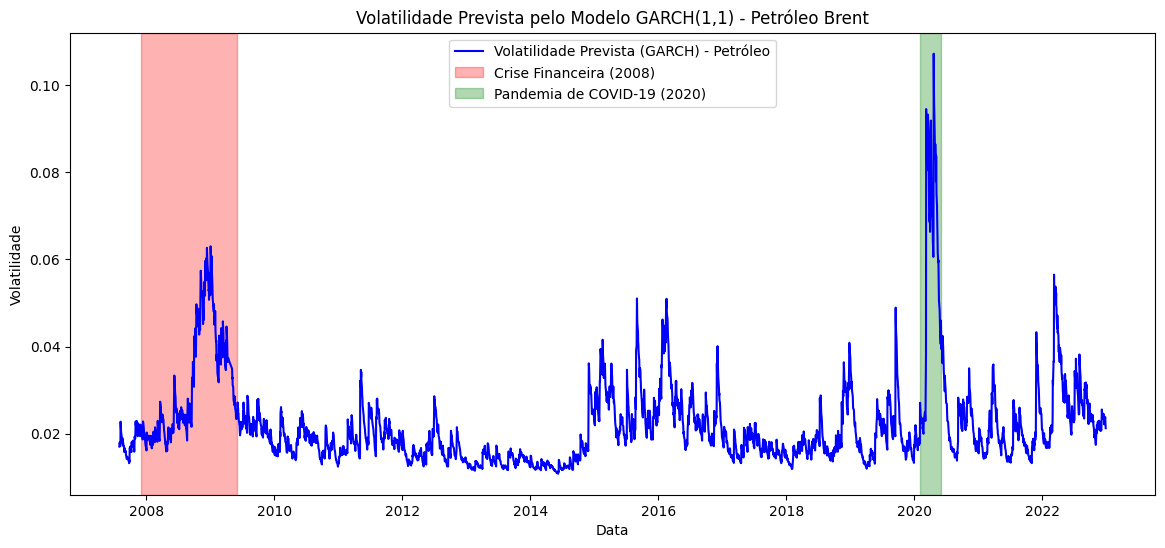

In [6]:
# 4. Modelo GARCH para Prever Volatilidade
def ajustar_modelo_garch(retornos):
    """
    Ajusta um modelo GARCH(1,1) aos retornos e retorna a volatilidade prevista.
    """
    modelo = arch_model(retornos, vol='Garch', p=1, q=1)
    resultados = modelo.fit(disp='off')
    print(resultados.summary())
    return resultados.conditional_volatility

# Ajustar modelo GARCH para o petróleo
volatilidade_garch_petroleo = ajustar_modelo_garch(retornos_commodities['BZ=F'])

# Visualização da volatilidade prevista pelo GARCH
plt.figure(figsize=(14, 6))
plt.plot(volatilidade_garch_petroleo, label='Volatilidade Prevista (GARCH) - Petróleo', color='blue')
plt.axvspan('2007-12-01', '2009-06-01', color='red', alpha=0.3, label='Crise Financeira (2008)')
plt.axvspan('2020-02-01', '2020-06-01', color='green', alpha=0.3, label='Pandemia de COVID-19 (2020)')
plt.title('Volatilidade Prevista pelo Modelo GARCH(1,1) - Petróleo Brent')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()
plt.show()

In [9]:
# 5. Cálculo do VaR com Base na Volatilidade GARCH
def calcular_var_garch(retornos, volatilidade, nivel_confianca=0.95):
    """
    Calcula o VaR usando a volatilidade prevista pelo GARCH.
    """
    z_score = stats.norm.ppf(1 - nivel_confianca)
    return retornos.mean() + z_score * volatilidade

var_garch = calcular_var_garch(retornos_commodities['BZ=F'], volatilidade_garch_petroleo)
print(f"\nVaR GARCH (95%): {var_garch.iloc[-1]:.4f}")


VaR GARCH (95%): -0.0349


In [8]:
# 6. Backtesting do VaR GARCH
def backtest_var(retornos, var, nivel_confianca=0.95):
    """
    Avalia a precisão do modelo VaR comparando com os retornos reais.
    """
    violacoes = retornos < var
    taxa_violacoes = violacoes.mean()
    print(f"Taxa de Violações do VaR: {taxa_violacoes:.4f} (esperado: {1 - nivel_confianca})")

# Backtest para o VaR GARCH
backtest_var(retornos_commodities['BZ=F'], var_garch)

Taxa de Violações do VaR: 0.0499 (esperado: 0.050000000000000044)
